In [53]:
import pandas as pd

In [54]:
df = pd.read_csv("../data/Blue whales Eastern North Pacific 1993-2008 - Argos data.csv")
df = df.drop(columns=["event-id","visible", "sensor-type", "individual-taxon-canonical-name", "study-name", "manually-marked-outlier","argos:best-level","argos:calcul-freq","argos:calcul-freq","argos:iq","argos:lc","argos:nb-mes","argos:nb-mes-120","tag-local-identifier", "argos:lat1", "argos:lat2", "argos:lon1", "argos:lon2"]) 

In [55]:
df.isna().sum()

timestamp                      0
location-long                  0
location-lat                   0
individual-local-identifier    0
dtype: int64

In [56]:
df.head()

,timestamp,location-long,location-lat,individual-local-identifier
0,1993-08-29 01:23:17.000,-122.407,36.981,1993CA-Bmu-00834
1,1993-08-31 13:04:34.000,-122.788,37.637,1993CA-Bmu-00834
2,1993-09-01 01:57:39.000,-122.827,37.166,1993CA-Bmu-00834
3,1993-09-01 22:35:12.000,-123.466,38.184,1993CA-Bmu-10823
4,1993-09-01 03:40:17.000,-123.410,37.141,1993CA-Bmu-10836


In [57]:
import datetime as dt

In [58]:
df["timestamp"] = df["timestamp"] .apply(lambda x: 
                                    dt.datetime.strptime(x,"%Y-%m-%d %H:%M:%S.%f"))

In [59]:
df["date"] = df["timestamp"].dt.date
df["time"] = df["timestamp"].dt.time

In [60]:
date = df["date"]

In [61]:
time = df["time"]

In [62]:
df["date"]= date

In [63]:
df["time"] = time

In [64]:
df = df.drop(["timestamp"], axis=1)

In [65]:
df.to_csv('data_transformed', index=False)

In [66]:
df[df["individual-local-identifier"]=="2007CA-Bmu-10836"] #una de las ballenas con más puntos de localización/año

,location-long,location-lat,individual-local-identifier,date,time
11849,-120.064,34.082,2007CA-Bmu-10836,2007-09-14,00:37:22
11850,-120.129,34.088,2007CA-Bmu-10836,2007-09-14,12:49:43
11851,-123.218,34.868,2007CA-Bmu-10836,2007-09-14,18:12:01
11852,-120.349,33.998,2007CA-Bmu-10836,2007-09-14,18:56:07
11853,-120.619,34.150,2007CA-Bmu-10836,2007-09-18,00:37:27
...,...,...,...,...,...
12297,-114.697,28.863,2007CA-Bmu-10836,2008-05-15,05:48:59
12298,-114.670,28.823,2007CA-Bmu-10836,2008-05-15,12:16:35
12299,-114.671,28.822,2007CA-Bmu-10836,2008-05-15,12:29:13
12300,-114.713,28.818,2007CA-Bmu-10836,2008-05-15,18:13:54


In [67]:
from datetime import datetime 

In [68]:
df["year"] = df["date"].apply(lambda x: x.year)

In [69]:
df["month"] = df["date"].apply(lambda x:x.month)

In [72]:
df=df.drop(columns=["date", "time"])

In [73]:
df

,location-long,location-lat,individual-local-identifier,year,month
0,-122.407,36.981,1993CA-Bmu-00834,1993,8
1,-122.788,37.637,1993CA-Bmu-00834,1993,8
2,-122.827,37.166,1993CA-Bmu-00834,1993,9
3,-123.466,38.184,1993CA-Bmu-10823,1993,9
4,-123.410,37.141,1993CA-Bmu-10836,1993,9
...,...,...,...,...,...
15540,-115.027,26.702,2008CR-Bmu-01388,2008,6
15541,-115.930,26.972,2008CR-Bmu-01388,2008,6
15542,-119.121,30.734,2008CR-Bmu-01388,2008,6
15543,-119.172,30.742,2008CR-Bmu-01388,2008,6


In [74]:
import folium
from folium import Map, Marker

In [75]:
import folium.plugins as plugins

In [76]:
data=[]

for _, d in df.groupby('year'):
    data.append([[row['location-lat'], row['location-long'], row['individual-local-identifier']] for _, row in d.iterrows()])

m = folium.Map(location=[28.773552, -115.176131], zoom_start=13,)
hm = plugins.HeatMapWithTime(data, auto_play=True,
                             display_index=False,
                             gradient={'0':'Navy', '0.25':'Lime','0.5':'Yellow', '0.75':'Blue','1': 'Red'},
                             max_opacity=0.8)

hm.add_to(m)


In [77]:
m

In [78]:
 m = Map([28.773552, -115.176131])

df[(df['individual-local-identifier'] == '2007CA-Bmu-10836')].apply(lambda row: folium.CircleMarker(location=[row["location-lat"], row["location-long"]], )
                                             .add_to(m), axis=1)


11849    <folium.vector_layers.CircleMarker object at 0...
11850    <folium.vector_layers.CircleMarker object at 0...
11851    <folium.vector_layers.CircleMarker object at 0...
11852    <folium.vector_layers.CircleMarker object at 0...
11853    <folium.vector_layers.CircleMarker object at 0...
                               ...                        
12297    <folium.vector_layers.CircleMarker object at 0...
12298    <folium.vector_layers.CircleMarker object at 0...
12299    <folium.vector_layers.CircleMarker object at 0...
12300    <folium.vector_layers.CircleMarker object at 0...
12301    <folium.vector_layers.CircleMarker object at 0...
Length: 453, dtype: object

In [79]:
m

In [80]:
from matplotlib import pyplot as plt
import numpy as np

(array([55., 24., 14., 11., 11.,  5.,  7.,  9.,  7.,  8.,  3.,  7.,  5.,
         2.,  0.,  2.,  1.,  2.,  0.,  1.,  1.]),
 array([  1.        ,  20.71428571,  40.42857143,  60.14285714,
         79.85714286,  99.57142857, 119.28571429, 139.        ,
        158.71428571, 178.42857143, 198.14285714, 217.85714286,
        237.57142857, 257.28571429, 277.        , 296.71428571,
        316.42857143, 336.14285714, 355.85714286, 375.57142857,
        395.28571429, 415.        ]),
 <BarContainer object of 21 artists>)

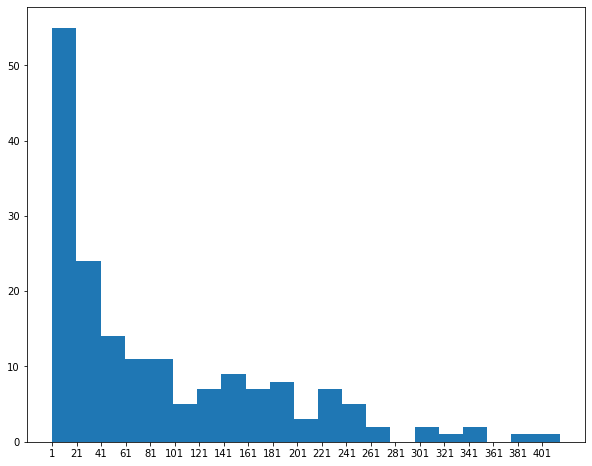

In [81]:
x=df.groupby(['individual-local-identifier','year']).count()['month']
plt.figure(figsize=(10,8))
ticks = np.arange(min(x), max(x), 20.0)
plt.xticks(ticks)
plt.hist(x, bins=len(ticks))

In [82]:
df.groupby(['individual-local-identifier','year']).count().iloc[x.argmax()]

location-long    415
location-lat     415
month            415
Name: (1999CA-Bmu-23043, 1999), dtype: int64